# Missing Values Code-Along

Here, we'll explore different ways of dealing with data with missing values. Let's go ahead and open up the ```customer_order_data.csv``` after importing the pandas library. 

In [1]:
import pandas as pd

df = pd.read_csv('../data/order_data/customer_order_data.csv')

First, let's make sure we understand what's in the data by taking a look at a few rows. 

In [6]:
df.head(15)

,customer_id,age,continent,price,order_id
0,01d3259f5b6a4cb4922ec2e0afb5e646,79,North America,407.58,4dec70945168406b9746c5132fdd7f1d
1,36ef50f007c34aad9c6a63710c9a4563,42,Africa,NaN,c317b09e68904e149dee8e0a7e9303e3
2,89b6495d66784f85ad0b7fd5eae96914,25,Europe,144.99,bd0fb7ad7f77474f977ecf0a20843d06
3,2612b5785b1d4108a788497caf1ea719,29,Africa,371.19,64bc1215da9c48969d4307f66fb5997b
4,c71c66d9b1e24ba6b14df4db75755e5f,55,North America,NaN,a03c3521321842428ee809ff973cf9e7
5,830f7188f1b1440c8a0a2b54ad7818b6,61,North America,286.87,64dc723c742e40e1bc717fd935c5ba84
6,22162db064ab4e09ac5e711f95ead4a3,53,Asia,467.28,e4a2bc15351d41c087fa825e7c5ebcec
7,279c17fe1d164ae7a75ba96f2111e6e9,80,Australia,115.61,162166d3127347a3a1eb8feaba83176e
8,f14ac1a17be44ecb8bdff3a21968fc14,50,North America,NaN,978580cc242146f3b37582aa66141e69
9,bc4ccb262e45466db88a5cf1a741e275,35,Asia,369.29,6c28ac87c7da4d45b83b3d0affe71fee


We already see some NaN values in the price column. This is good! We know that we need to be careful how we proceed.  

The data itself seems decent: we have a ```customer_id``` to uniquely identify each customer while protecting their privacy. Similarly, we have a unique ```order_id``` associated to each order. In between, we have a bit of data on each customer: their ```age``` and on which ```continent``` they live. Finally, we have the ```price``` of the order they made. 

Let's consider some of the basic questions we might ask about this data. For instance, let's answer the following questions:

1. How many customers do we have from each continent?

2. How many repeat buyers do we have?

3. What is the average age of each customer?

4. What is the average order value?

5. What is the average order value based on age ranges?

6. What is the average order value based on continent?

### Question 1

We use this question as an example to introduce some new functions that will be very useful to you in answering the next few questions. 

We want to count the number of customers from each continent. In SQL, this might look like ```SELECT continent, COUNT(distinct customer_id) from orders GROUP BY 1 ORDER BY 2 DESC```, but how do we do this with Python? Let's first grab only the ```customer_id``` and ```continent``` column of our dataframe, and drop any duplicated data (for instance, due to repeat buyers).

In [7]:
customers_continents = df[['customer_id', 'continent']].drop_duplicates()

Next, we'll use a *very useful* aggregation function that achieves the same objective as the SQL query above. It looks like this: ```dataframe.groupby(column or list of columns).method()```. That is, given a dataframe, we use the ```groupby``` method and specify which columns we want to aggregate. Finally, we pass a method specifying how we want the data to be aggregated. Let's aggregate on ```continent``` and use the ```size()``` method to count how many entries are associated with each continent. Since we already dropped duplicate data, this will tell us exactly what we want! Details on all the methods with a ```groupby``` object can be found [here](https://pandas.pydata.org/docs/reference/groupby.html#computations-descriptive-stats).

In [1]:
#customers by continent - your code goes below:


We have approximately the same amount of customers from each continent. Nothing out of the ordinary here!

### Question 2

Let's use some of the techniques we covered in class. In particular, we will use the ```pd.value_counts``` function, and select the data having values greater than 1. Finally, we'll get the shape of the data. 

In [2]:
#repeat buyers - your code goes below:


A quick exercise here would be checking how many customers we have in total. Just under half of our customers are repeat buyers.

### Question 3

Recall that we previously used the ```mean()``` method with dataframes.

In [3]:
#mean age - your code goes below:


### Question 4

Here is where we have to start being careful! Recall that we saw some missing values in the ```price``` column. If we look at the documentation for the dataframe ```mean()``` method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html?highlight=mean#pandas.DataFrame.mean), we see that it defaults to passing over missing values. If the missing values are unbiased (that is, they occur with equal probability across each subgroup), this is fine --- but we should make sure this is the case. Let's look at how our data is distributed after we drop missing values, using the ```dropna()``` method.

In [15]:
no_miss_df = df.dropna()

We have two fields to investigate: ```age``` and ```continent```. To make sure the data looks good for age, we'll produce a quick, basic plot using some built-in plotting methods (note: there will be a *lot* more on plotting later).

<AxesSubplot:xlabel='age'>

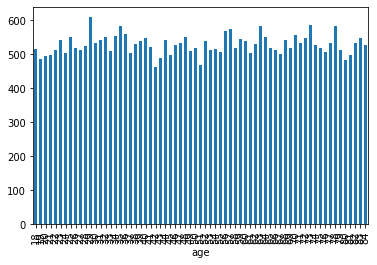

In [24]:
no_miss_df.groupby('age').size().plot(kind='bar')

<AxesSubplot:xlabel='age'>

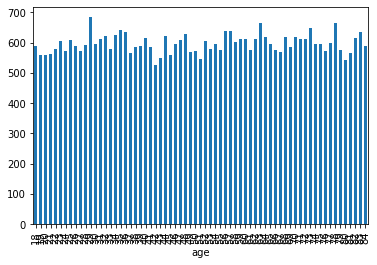

In [19]:
df.groupby('age').size().plot(kind='bar')

The plots look similar, and there does not seem to be bias based on age towards missing values. Let's check the same for continents.

<AxesSubplot:xlabel='continent'>

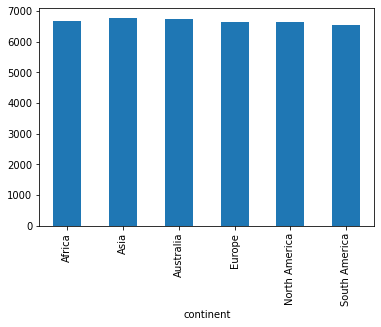

In [20]:
df.groupby('continent').size().plot(kind='bar')

<AxesSubplot:xlabel='continent'>

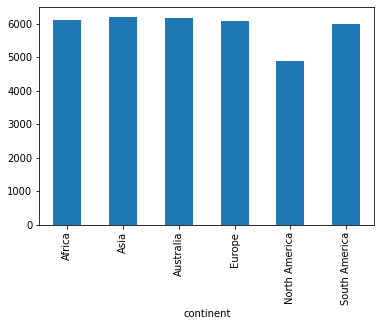

In [21]:
no_miss_df.groupby('continent').size().plot(kind='bar')

Interestingly, we drop a lot of North America data when we remove missing values. Our first question should be: how will this affect our calculations? If we just skip over values, will there be a significant difference in this sample mean versus the true mean? The big difficulty here is that **we simply do not know**. However, in this case, we can observe that the amount of data we have from North American customers is still comparable to the data from other customers, and the amount of complete data for North American customers is much larger than the amount of incomplete data.

One sanity check we can make is to ensure that the average order value in North America with the data we currently have is similar to a comparable continent. Of course, we don't know where exactly this data comes from, so buying patterns could differ significantly across different continents, but this is the best we have to work with. Let's compare means of North America and Europe. 

In [26]:
df.groupby('continent').mean()['price'].loc[['North America', 'Europe']]

continent
North America    277.049074
Europe           276.602523
Name: price, dtype: float64

The means are very similar. This can at least put us a little at ease. If we assume similar buying patterns between continents, then it means that the missing values are not biased towards high or low order values. Nevertheless, if you were to encounter data like this on the job, it would be prudent to let the developers know of this bias!

What if we had seen drastically different mean average order values from North America and Europe? We would probably have to leave out the North America data from our exploration, and communicate this as part of our analysis. For now, let's continue looking into this data!

In [4]:
#Average order value - your code goes below:


### Question 5

Let's think about how we can compare average order value across age ranges. It wouldn't be that helpful to look at average order value across each age --- instead, let's collapse the ages into ranges to allow for easier digestion when we look at the means. For now, let's convert ages into categories. Let's say anything under 30 is ```young```, between 30 and 60 is ```middle-aged```, and anything over 60 is ```senior```. Below, let's write a function that takes an age and returns one of these categories. 

In [5]:
#age range conversion function - your code goes below:
def age_range(age):
    return

Next, we'll use this function to create a new column in our dataframe. This is a taste of what we'll be seeing next lesson!

In [34]:
df['age-range'] = df['age'].apply(age_range)

Now, let's calculate our average order value.

In [6]:
#average order value by age-range - your code goes below:


### Question 6

Finally, we can compare average order value by continent. Again, with the short analysis on missing values we did above, this should be fine.

In [7]:
#average order value by continent - your code goes below:


## Recap

We looked a bit into a dataset with some missing values, and we saw how to

- Use the groupby function to aggregate our data
- Proceed when there are missing values in our data
- Practice some concepts we covered in class